In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
def NSE(y_pred, y_true):
    y_mean = np.mean(y_true)
    a = np.sum(np.square(y_true[:16] - y_pred[:16]))
    b = np.sum(np.square(y_true[:16] - y_mean))
    c = np.sum(np.square(y_true[16:] - y_pred[16:]))
    d = np.sum(np.square(y_true[16:] - y_mean))
    return 100 * (1 - 0.65 * a / b - 0.35 * c / d)

In [3]:
water = pd.read_excel('../input/入库流量数据.xlsx')
water.head()

y_train1 = water.loc[(water['TimeStample'] >= '2017-02-01 02:00:00') & (water['TimeStample'] <= '2017-02-07 23:00:00')]
y_train2 = water.loc[(water['TimeStample'] >= '2017-08-01 02:00:00') & (water['TimeStample'] <= '2017-08-07 23:00:00')]
y_train3 = water.loc[(water['TimeStample'] >= '2017-11-01 02:00:00') & (water['TimeStample'] <= '2017-11-07 23:00:00')]
print(y_train1.shape, y_train2.shape, y_train3.shape)

y_train1 = y_train1['Qi'].values
y_train2 = y_train2['Qi'].values
y_train3 = y_train3['Qi'].values

(56, 2) (56, 2) (56, 2)


In [4]:
train_test1 = pd.read_csv('../input/train_test1_2017.csv')
train_test2 = pd.read_csv('../input/train_test2_2017.csv')
train_test3 = pd.read_csv('../input/train_test3_2017.csv')

In [5]:
train_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TimeStample  304 non-null    object 
 1   Qi           248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [6]:
train1 = train_test1.loc[train_test1['Qi'].notnull(), :]
test1 = train_test1.loc[train_test1['Qi'].isnull(), :]
test1_true = test1['Qi'].values

train2 = train_test2.loc[train_test2['Qi'].notnull(), :]
test2 = train_test2.loc[train_test2['Qi'].isnull(), :]
test2_true = test2['Qi'].values

train3 = train_test3.loc[train_test3['Qi'].notnull(), :]
test3 = train_test3.loc[train_test3['Qi'].isnull(), :]
test3_true = test3['Qi'].values

In [7]:
data = [train1, train2, train3]
for i in data:
    i.sort_values(by='TimeStample', inplace=True)
    i['ds'] = pd.to_datetime(i['TimeStample'])
    i['y'] = np.log(i['Qi'])
    i.drop(['TimeStample', 'Qi'], axis=1, inplace=True)

In [8]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      248 non-null    datetime64[ns]
 1   y       248 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [9]:
m1 = Prophet()
m1.fit(train1)

m2 = Prophet()
m2.fit(train2)

m3 = Prophet()
m3.fit(train3)


future1 = m1.make_future_dataframe(periods=56, freq='3H')
future2 = m2.make_future_dataframe(periods=56, freq='3H')
future3 = m3.make_future_dataframe(periods=56, freq='3H')

# print(future1.head().append(future1.tail()))
# print(future2.head().append(future2.tail()))
# print(future3.head().append(future3.tail()))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


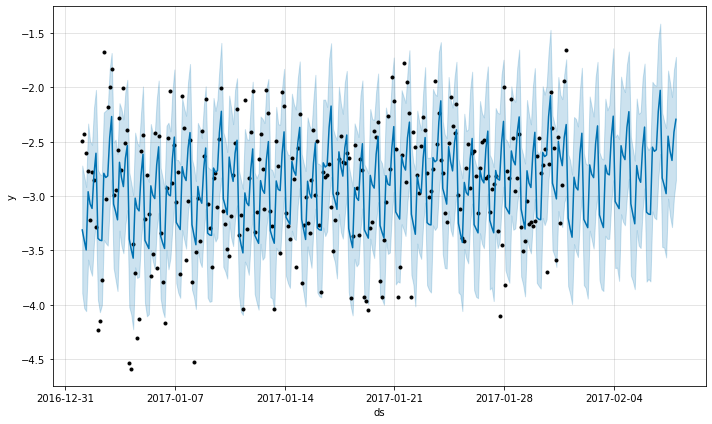

In [10]:
pred1 = m1.predict(future1)
m1.plot(pred1);

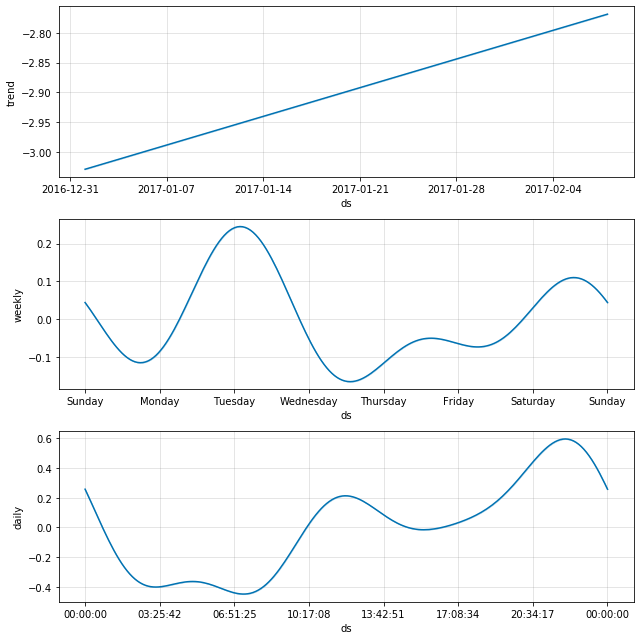

In [11]:
m1.plot_components(pred1);

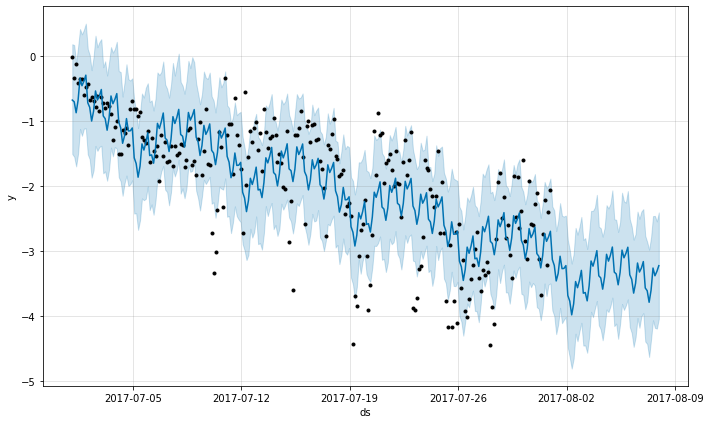

In [12]:
pred2 = m2.predict(future2)
m2.plot(pred2);

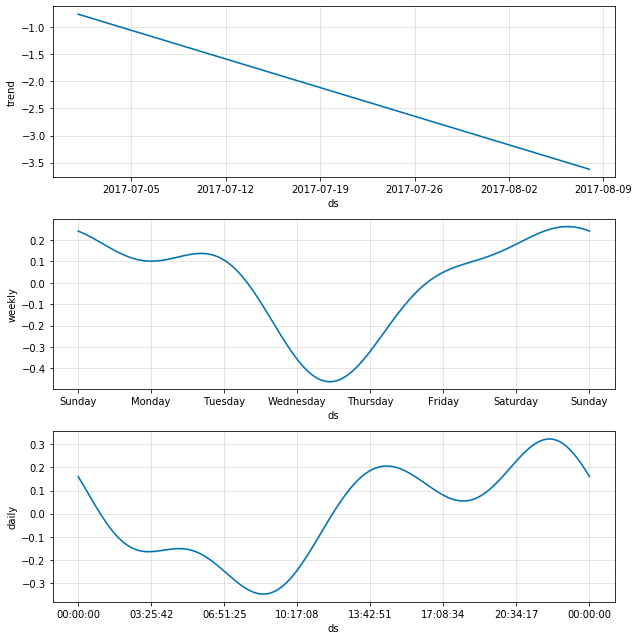

In [13]:
m2.plot_components(pred2);

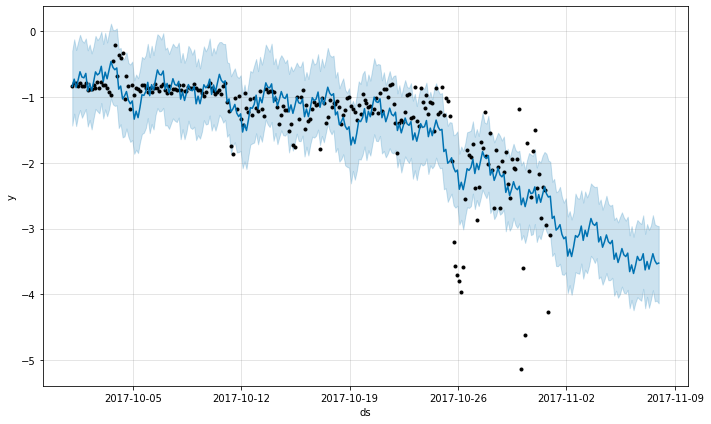

In [14]:
pred3 = m3.predict(future3)
m3.plot(pred3);

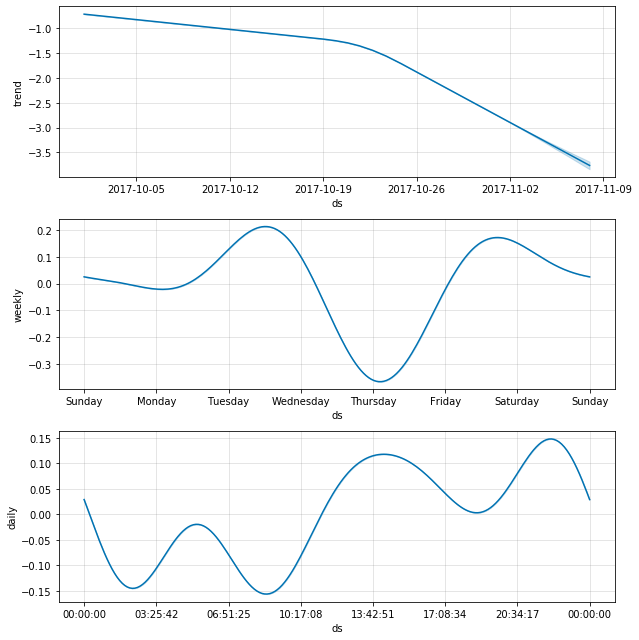

In [15]:
m3.plot_components(pred3);

In [16]:
pred1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 02:00:00,-3.029065,-3.891792,-2.719007,-3.029065,-3.029065,-0.281967,-0.281967,-0.281967,-0.303319,-0.303319,-0.303319,0.021352,0.021352,0.021352,0.0,0.0,0.0,-3.311032
1,2017-01-01 05:00:00,-3.028206,-4.030385,-2.816069,-3.028206,-3.028206,-0.377974,-0.377974,-0.377974,-0.362606,-0.362606,-0.362606,-0.015367,-0.015367,-0.015367,0.0,0.0,0.0,-3.406180
2,2017-01-01 08:00:00,-3.027346,-4.058271,-2.915790,-3.027346,-3.027346,-0.467887,-0.467887,-0.467887,-0.416849,-0.416849,-0.416849,-0.051038,-0.051038,-0.051038,0.0,0.0,0.0,-3.495233
3,2017-01-01 11:00:00,-3.026487,-3.584490,-2.332559,-3.026487,-3.026487,0.067120,0.067120,0.067120,0.148788,0.148788,0.148788,-0.081668,-0.081668,-0.081668,0.0,0.0,0.0,-2.959367
4,2017-01-01 14:00:00,-3.025627,-3.672088,-2.494937,-3.025627,-3.025627,-0.045895,-0.045895,-0.045895,0.057700,0.057700,0.057700,-0.103595,-0.103595,-0.103595,0.0,0.0,0.0,-3.071522


In [17]:
test_pred1 = np.exp(pred1.iloc[-56:, :]['yhat'].values)
test_pred2 = np.exp(pred2.iloc[-56:, :]['yhat'].values)
test_pred3 = np.exp(pred3.iloc[-56:, :]['yhat'].values)

In [19]:
NSE(y_train1, test_pred1), NSE(y_train2, test_pred2), NSE(y_train3, test_pred3)

(-258.19561251848893, -2071.170104811878, -297.0021569118596)